In [159]:
#Algoritmo de ML escolhido
# Considerando que o pretendido é encontrar empresas com as mesmas características para soluções em tratamento de água
# escolhi usar um algoritmo não supervisionado que possa agrupas as empresas com base em características similares
# Dessa forma, escolhi o K-Means

#importando as biliotecas
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [148]:
#Carregando o Dataframe
df_canada = pd.read_csv('canada_amostra.csv', sep=',')
df_canada.head()

,name,description,employees,total_funding,city,subcountry,lat,lng
0,fitin,fitin is the latest fit tech platform that pro...,1.0,NaN,toronto,ontario,43.70011,-79.416300
1,quinditech,our services include independent & collaborati...,10.0,NaN,montreal,quebec,45.50884,-73.587810
2,botfirst,chatlanding is a digital chatbot platform wher...,1.0,NaN,toronto,ontario,43.70011,-79.416300
3,bravver,ai-powered army of health professionals in you...,1.0,NaN,quebec,quebec,46.82596,-71.235223
4,stylify,stylify is a mobile platform that connects peo...,1.0,NaN,toronto,ontario,43.70011,-79.416300


In [149]:
#Conhecendo o tamanho do Dataframe
df_canada.shape

(21296, 8)

In [150]:
#Verificando dados do Dataframe.
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21296 entries, 0 to 21295
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           21295 non-null  object 
 1   description    21296 non-null  object 
 2   employees      21284 non-null  float64
 3   total_funding  2279 non-null   object 
 4   city           21282 non-null  object 
 5   subcountry     21282 non-null  object 
 6   lat            21282 non-null  float64
 7   lng            21268 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [151]:
#A coluna description está completa em todas as linhas. 
#Farei a clusterização das empresas pela descrição. Dessa forma, todas as linhas estão satisfeitas.

#Criando as palavras chaves
#no primeiro conjunto de palavras, utilizei as que constavam no exercício e não foi encontrada nenhuma empresa com essas três expressões. Com isso criei novas expressões baseadas nelas

#palavras_chaves = ['solutions on waste and water', 'improve water quality', 'water efficiency use']
palavras_chaves = ['water treatment', 'water quality', 'water resources']

#Verificando a existências da palavra chave na descrição e criando uma coluna de identificação
for chave in palavras_chaves:
    df_canada[chave.lower()] = df_canada['description'].str.lower().str.contains(chave.lower()) 

#selecionar apenas colunas para predict do modelo
X = df_canada[palavras_chaves]

modelo = KMeans(n_clusters=3, random_state=42)
df_canada['cluster'] = modelo.fit_predict(X)

C:\Users\lucia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [152]:
#faz a separação das empresas que apresentaram tratamento de água em um novo Dataframe
empresas_agua = df_canada[df_canada['cluster']==1]

empresas_agua.shape

(29, 12)

In [154]:
#listagem das empresas
empresas_agua.head(30)

,name,description,employees,total_funding,city,subcountry,lat,lng,water treatment,water quality,water resources,cluster
233,aquova,"at aquova, we have developed the world’s first...",1.0,NaN,toronto,ontario,43.70011,-79.41630,True,False,False,1
1533,jurota company,the group currently operates mainly in the fiv...,500.0,NaN,toronto,ontario,43.70011,-79.41630,True,False,False,1
2235,z3 controls,z3 controls inc.is an advanced energy technolo...,0.0,NaN,markham,ontario,43.86682,-79.26630,True,False,False,1
2441,connect control systems,connect control systems inc. focus is to deliv...,0.0,NaN,edmonton,alberta,53.55014,-113.46871,True,False,False,1
3533,scicorp international,scicorp biologic® is a proprietary plant-based...,0.0,NaN,barrie,ontario,44.40011,-79.66634,True,False,False,1
3971,ionomr,"for device integrators in water treatment, gri...",10.0,NaN,vancouver,british columbia,49.24966,-123.11934,True,False,False,1
4046,noddis water security,this is a custom designed water treatment plan...,0.0,NaN,calgary,alberta,51.05011,-114.08529,True,False,False,1
6511,upcitiesx,our challenge will help cities meet climate-in...,0.0,NaN,kingston,ontario,44.22976,-76.48098,True,False,False,1
6569,bdc ice venture fund,"the bdc capital industrial, clean and energy t...",0.0,NaN,montreal,quebec,45.50884,-73.58781,True,False,False,1
7147,texers,texers inc. is a growing international technic...,0.0,NaN,toronto,ontario,43.70011,-79.41630,True,False,False,1


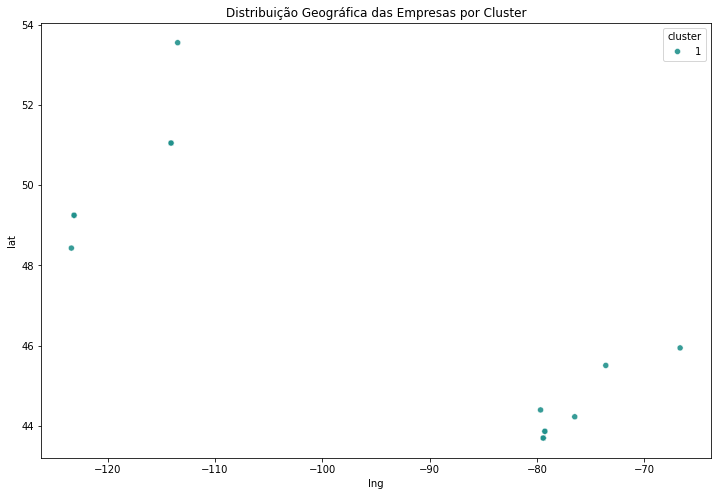

In [161]:
#Exercício 2

#plotar as localizações de cada empresa
#empresas_agua.plot(kind="scatter", x='lng', y='lat', alpha=0.4, c=empresas_agua['employees'], s=50, cmap=plt.get_cmap('jet'), figsize=(12,8))

plt.figure(figsize=(12, 8))
sns.scatterplot(x='lng', y='lat', hue='cluster', data=empresas_agua, palette='viridis', alpha=0.9)
plt.title('Distribuição Geográfica das Empresas por Cluster')
plt.show()
